In [1]:
# 이번 강의에선 좀 더 실전에 나올만한 문제들을 풀어봄

In [ ]:
# acmicpc.net/problem/9251

# 와우 이건 머리로도 안풀리는 유형인데 이게 난이도 '하' 면 '상'은 어느정도인거야

# 


In [7]:
# 선생님

# 이문제는 LCS라는 문제임

# 이 문제도 전형적이고 교과서에서도 볼 수 있는 문제

# 어느 교과서냐 

# 일단 시간복잡도는 O(N^2)으로 풀수 있음

# 우선 다음과 같이 일반항을 정의함.

# D[i][j] = X[0...i]와 Y[0...j]의 공통 부분 수열의 최대 길이

# 둘다 하나씩 올려가면서 공통 부분 수열의 길이를 구해나가는 거임.

# D[i][j] = D[i-1][j-1]+1               if X[i] = Y[j]
# D[i][j] = max(D[i][j-1], D[i-1][j])   if X[i] != Y[j]

# 일단 결론은 이렇게 풀면됨. 

# 값이 같으면 대각선 위쪽에서 +1 해주고
# 다르면 왼쪽, 위쪽 중 큰걸 써줌

# 이 선생님은 '왜' 를 좀 설명해줬으면 좋겠다
# '어떻게'는 답지 보면 알지

x= input()
y= input()

dp = [[0]*(len(y)+1) for _ in range(len(x)+1)] # 이번 테이블 만들땐 공집합 자리도 하나 주어야함

for i in range(1, len(x)+1):
    for j in range(1, len(y)+1):
        if x[i-1] == y[j-1]:
            dp[i][j] = dp[i-1][j-1]+1
        else:
            dp[i][j] = max(dp[i][j-1], dp[i-1][j])
            
print(dp[len(x)][len(y)])

ACAYKP
CAPCAK
4


In [8]:
dp

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 2, 2, 2],
 [0, 1, 2, 2, 2, 3, 3],
 [0, 1, 2, 2, 2, 3, 3],
 [0, 1, 2, 2, 2, 3, 4],
 [0, 1, 2, 3, 3, 3, 4]]

좋아 '왜'에 대한 부분은 내가 해설해줌

우선 전체 문자열 예시는 문제의 예시대로 쓴다.

a = ACAYKP

b = CAPCAK

여기서 이해해야될 포인트는 

1. i번째와 j번째가 다를때 왜 왼쪽, 위쪽 중 큰걸 가져오나
2. i번째와 j번째가 같을때 왜 대각선 위에서 +1을 하나

우선 1부터 설명 들어감. 일단<br>
ACAYKP & CAPC (i, j)<br>
이 두개를 비교할 때라고 보자. 비교중인 가장 끝 글자는 P, C다<br>
일단 다르다.<br>
다른데, 계산 순서에 의하면<br>
ACAYKP & CAP (i, j-1) <br>
ACAYK & CAPC (i-1, j)<br>
이 두개는 계산이 되어있다.<br>
근데 지금 비교중인 ACAYKP & CAPC 는 둘을 모두 포함한다.<br>
따라서 두 경우((i, j-1), (i-1, j))의 LCS를 모두 포함할수 있으니 그중 큰걸 가져오면 된다.

2번 설명 들어간다.<br>
ACAYK & CAPCAK (i, j)<br> 
이걸 비교해야 된다고 생각하자. 근데 계산 순서에 의해<br>
ACAY & CAPCA (i-1, j-1)<br>
이건 구해져있다. 여기서 어떤 수열이 LCS인지는 몰라도 되고 모르겠지만, <br>
끝에 K가 같으므로 그 뭔지 모를 ACAY & CAPCA 의 LCS에 K에 붙이면 된다.<br>
그러므로 길이는 그냥 대각선 위에서 +1만 해주며 되는 것임. 

이게 동적 프로그래밍이다. 앞의 계산 결과를 뒤에서 쓰는거

In [9]:
# acmicpc.net/problem/1495

# greedy 하게 가면 2^100 나오니까 아니고.

# 동적 프로그래밍이라는데 볼때마다 새롭네.

# 이것도 머리로도 안풀린다.. 패배감 오지네 분노 상승중



In [13]:
# 선생님

# '차례도록 곡을 연주한다는 점'에서 동적 프로그래밍을 떠올릴수 있는 문제임

# 곡의 갯수 N, 볼륨 맥스 M 일때 O(NM)으로 풀 수 있음

# 핵심 아이디어 : 모든 볼륨에 대해 연주 가능 여부를 계산

# D[i][j+] = i번째 노래일때 j 크리의 볼륨으로 연주 가능한지 여부

# D[i][j-V[i]] = True if D[i-1][j] = True
# D[i][j+V[i]] = True if D[i-1][j] = True

# 테이블로 보자. 

# 아 테이블로 보니까 아이디어는 겁내 쉽네

# true/false 테이블에서 핑퐁하듯이 True를 튀기면 되네

# 근데 아이디어가 미춌다...

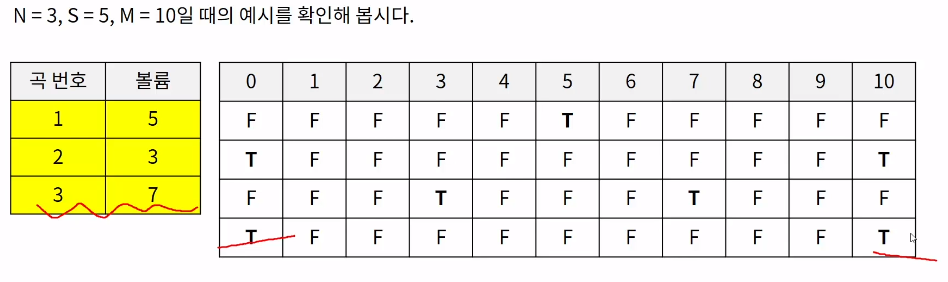

In [11]:
n, s, m = map(int, input().split())
array = list(map(int, input().split()))

dp = [[0]*(m+1) for _ in range(n+1)]
dp[0][s] = 1

for i in range(1, n+1):
    for j in range(m+1):
        if dp[i-1][j] == 0:
            continue
        if j-array[i-1] >=0:
            dp[i][j-array[i-1]] = 1
        if j+array[i-1] <= m:
            dp[i][j+array[i-1]] = 1

result = -1

for i in range(m, -1, -1):
    if dp[n][i] == 1:
        result = i
        break
        
print(result)

3 5 10
5 3 7
10


In [12]:
dp

[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [78]:
# acmicpc.net/problem/2655

# 야 이문제는 '상'인데

# 클래스 선언
class Block:
    def __init__(self, idx, area, height, weight):
        self.idx = idx
        self.area = area
        self.weight = weight
        self.height = height
        
# 문제 입력 및 블럭 배열 생성
n = int(input())
array = []
for i in range(n):
    a, h, w = map(int, input().split())
    array.append(Block(i, a, h, w))

5
25 3 4
4 4 6
9 2 3
16 2 5
1 5 2


In [79]:
# 면적순 내림차순 정렬
array = sorted(array, key=lambda x: -x.area)

In [80]:
# 동적 프로그래밍 돌릴 테이블 생성
table = [[[],0] for _ in range(n)]

In [81]:
import copy

# 프로그래밍 돌림.
for i in range(n):
    if i==0:
        table[i][0].append(array[i].weight)
        table[i][1]=array[i].height
    else:
        now = array[i]
        max_h = 0
        max_idx = -1
        for j in range(i):
            last_w = table[j][0][-1]
            if last_w > now.weight:
                if max_h < table[j][1]:
                    max_h = table[j][1]
                    max_idx = j
        if max_idx == -1:
            table[i][0].append(array[i].weight)
            table[i][1]=array[i].height
        else:
            table[i][0]=(copy.deepcopy(table[max_idx][0]))
            table[i][0].append(array[i].weight)
            table[i][1] = table[max_idx][1] + array[i].height

In [98]:
# 무게들
max_h = 0
weight_array = []

for data in table:
    if data[1]>max_h:
        max_h = data[1]
        weight_array = data[0] 

weight_array = sorted(weight_array)

In [84]:
# 무게 순으로 정렬
array = sorted(array, key=lambda x: x.weight)

In [96]:
# 답 출력
print(len(weight_array))

idx = 0

for i in array:
    if idx >= len(weight_array):
        break
    if weight_array[idx]==i.weight:
        print(i.idx+1)
        idx += 1

# 문제의 논리는 이렇게 구성함
# 일단 이건 다룰 속성이 많으니까 클래스를 만듬.

# 그리고 일단 넓이순으로 정렬하고 시작 -> 넓이, 무게, 높이를 고려해야 하는데 일단 변수 하나 죽이고 시작

# 다음 그 저번에 가장 긴 수열 문제 풀듯이 무게가 내립차순을 향하되, 높이를 고려해서 테이블 짬.

# 테이블 다 짜놓고 나면 그냥 답 출력하는 과정.

3
5
3
1


In [101]:
# 오호 '상'짜리 혼자 풀었음. 물론 시간은 구상 빼고 구현만 50분 걸린거 같지만..

# 논리적으로 구상은 사실 어제(12/29) 밤에 살짝 한 걸로 거의 나왔고 

# 오늘(12/30)은 구현하면서 논리 조금 다듬은거 밖에 없는데도 50분 걸렸다.

# 구현하다가 논리 수정하고 그러니까 구현이 오래 걸리는 거 같음. 

# 머릿속으로 더 깔끔하게 논리 짜놓고 들어가자.


# 특히, 이 문제에서 실질적인 답은 다 구해놓고 출력 하는거 구현에도 조금 실망스러운 시간이 걸림

# 그래도 제시시간(50분)의 두배(100분) 안에는 푼거 같음

In [102]:
# 선생님

# 이문제는 증가하는 부분수열, LIS의 상위호환 문제임

# 이정도 동적프로그래밍을 혼자 풀 수 있다면 웬만한 코딩 테스트는 통과 할 것이다.

# 벽돌의 수가 N 일때 O(N^2)로 해결할수있고

# 번호를 출력하는게 답이기 때문에 다 해놓고 번호를 또 역추적 해야 함.


# 역시 가장 먼저 무게를 기준으로 정렬함.

# D[i] = 인덱스가 i인 벽돌을 가장 아래에 두었을때 최대 높이

# 각 별돌에 대해 확인하며 D[i] 를 갱신함

# 모든 0<=j<i 에 대해 D[i] = max(D[i], D[j]+height[i])  if area[i] > area[j]


# 여기서도 공집한 벽돌을 넣어주면 테이블 다루기 쉬워짐.

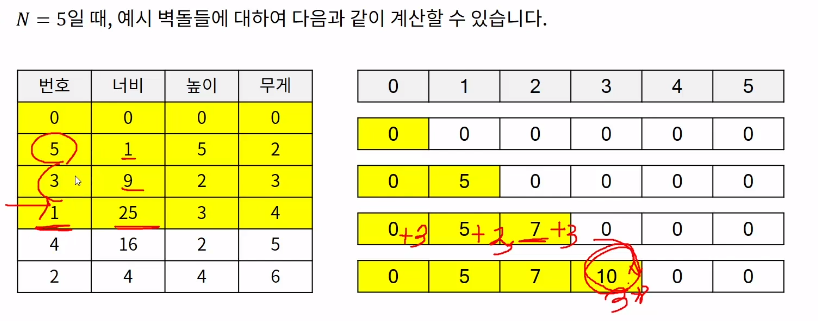

In [104]:
# 이런 식으로 돌리면 일단 높이 최대를 찾을 수 있음.

# 오른쪽 테이블의 i번째 인덱스는 왼쪽 테이블에서 i번째 벽돌이 가장 아래 있을때의 높이.

# 오른쪽 테이블에서 i번째 구할때 왼쪽 테이블 0~i 번 도는거임.

# 반복 횟수는 나랑 같음

# 근데 이 번호를 역추적 하는 과정도 재밌음

# 높이 10이 max인데 테이블에서 인덱스가 3번인데

# 그걸 왼쪽 테이블에서 찾으면 1임. 그리고 왼쪽 1번의 높이인 3을 10에서 빼면

# 7인데 10의 왼쪽중 7의 인덱스는 2이고...

In [112]:
n = int(input())

# 왼쪽 테이블이라고 말했던 배열
array = []

array.append((0,0,0,0)) # 공집합 벽돌

for i in range(1, n+1):
    area, height, weight = map(int, input().split())
    array.append((i, area, height, weight))
    
# 무게로 정렬
array.sort(key=lambda data:data[3])

# 오른쪽 테이블 생성
dp = [0]*(n+1)

for i in range(1, n+1):
    for j in range(0,i):
        if array[i][1] > array[j][1]:
            dp[i] = max(dp[i], dp[j]+array[i][2]) # max함수 안에 구하고자 하는 dp[i]를 넣음으로써 내가 했던 max변수 만들고 local max만들고 비교하고 이걸 줄일 수 있음.

max_value = max(dp)

index = n

result = []

# 번호 역추적
while index != 0:
    if max_value == dp[index]:
        result.append(array[index][0])
        max_value -= array[index][2]
    index -= 1
    
result.reverse()

print(len(result))
[print(i) for i in result] # 별 잡기술을 다쓰네

5
25 3 4
4 4 6
9 2 3
16 2 5
1 5 2
3
5
3
1


[None, None, None]

In [ ]:
# 이정도만 풀어도 실제 코딩테스트에서 어렵지 않게 풀 수 있다구요??
# 쉽네 생각보다.